In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import timeit
import math

# path of bridge data for reading csv file (_roads2)
road_path       = 'C:\Studie\TEL\Advanced_discrete_simulation\Lab2\WBSIM_Lab2\WBSIM_Lab2\infrastructure\_roads3.csv'

# path of bridge data for reading Excel file (BMMS_overview)
bridge_path     = 'C:\Studie\TEL\Advanced_discrete_simulation\Lab2\WBSIM_Lab2\WBSIM_Lab2\infrastructure\BMMS_overview.xlsx'

# define variables
path  = 'C:\Studie\TEL\Advanced_discrete_simulation\Lab1\RMMS' # path to RMMS

rname = 'N1' # name of the road to load

## Preprocessing data from _roads and BMMS_overview data

In [2]:
# reading raw data
df_orig  = pd.read_csv(road_path,index_col=None, header=0)
bdf_orig = pd.read_excel(bridge_path, index_col=None, header=0)

# copy dataframe
df = df_orig.copy()
bdf = bdf_orig.copy()

# Display Number of data 
print('')
print('Total Road Data :' ,len(df),'Data')
print('')
print('Total Bridge Data :' ,len(bdf),'Data')


Total Road Data : 51348 Data

Total Bridge Data : 20415 Data


In [13]:
# Create dataframe for N1 roads with filtered longitude and lattitude Bounding box
df_selected  = df[(df['road'] == rname)].sort_values(by = 'chainage')
bdf_selected = bdf[(bdf['road'] == rname)].sort_values(by = 'chainage')

print('Total', rname ,'Roads data:',len(df_selected))
print('Total', rname ,'Bridges data:', len(bdf_selected))

Total N1 Roads data: 1339
Total N1 Bridges data: 787


In [14]:

df_selected['width'] = np.nan
df_selected['Length'] = np.nan
df_selected['Quality'] = np.nan
df_selected['LinkName'] = np.nan
df_selected['constructionYear'] = np.nan

# mark which data is from which source
df_selected['Data_source'] = 'road3'

bdf_selected['Data_source'] = 'BMMS'

# drop unnecessary column that is not needed in the construction of excel files
df_selected = df_selected.drop(['gap'], axis=1)
bdf_selected = bdf_selected.drop(['km', 'structureNr', 'spans', 
                                  'zone','circle','division',
                                  'sub-division', 'EstimatedLoc'], axis=1)

# rename some columns names
bdf_selected = bdf_selected.rename(index=str, columns={'LRPName': 'lrp' ,'condition':'Quality',
                                                       'length':'Length', 'roadName':'LinkName'})


In [15]:
# Combined roads and bridges data
df1_combined = pd.concat([df_selected, bdf_selected]).sort_values(by = 'chainage')

# drop duplicates
df1_combined = df1_combined.drop_duplicates(subset = ['lrp'], keep = 'first', inplace=False)
df1_combined = df1_combined.sort_values(by = 'chainage')

# preparing columns to be combined with html data later on
df1_combined = df1_combined.rename(index=str, columns={'chainage': 'ChainageS','lrp': 'LRPStart'})
df1_combined['OffsetStart'] = np.nan
df1_combined['LRPEnd'] = np.nan
df1_combined['OffsetEnd'] = np.nan
df1_combined['ChainageE'] = np.nan
df1_combined['Distance'] = np.nan
df1_combined['Heavy Truck'] = np.nan
df1_combined['Medium Truck'] = np.nan
df1_combined['Small Truck'] = np.nan
df1_combined['Large Bus'] = np.nan
df1_combined['Medium Bus'] = np.nan
df1_combined['Micro Bus'] = np.nan
df1_combined['Utility'] = np.nan
df1_combined['Car'] = np.nan
df1_combined['Auto Rickshaw'] = np.nan
df1_combined['Motor Cycle'] = np.nan
df1_combined['Bi-Cycle'] = np.nan
df1_combined['Cycle Rickshaw'] = np.nan
df1_combined['Cart'] = np.nan
df1_combined['Motorized'] = np.nan
df1_combined['Non Motorized'] = np.nan
df1_combined['AADT'] = np.nan
df1_combined['nrLanes'] = np.nan

# # Change the order of the dataframe columns name
# df1_combined = df1_combined[['road', 'lrp','chainage','lat','lon', 'width','Quality','Length',
#                              'constructionYear','point_type','type','LinkName','name']]

## Get data from RMMS html

In [3]:
# function to collect traffic data
def getTraffic(path, rname):


# import traffic html file
    htmlPath = path + '\\' + rname + ".traffic.htm"
    rawHtml  = pd.read_html(htmlPath)[4]        # reading raw html

    rawHtml.loc[2,0] = 'LinkNo'
    rawHtml.loc[2,1] = 'LinkName'
    rawHtml.loc[2,4] = 'ChainageS'
    rawHtml.loc[2,7] = 'ChainageE'

    tf         = rawHtml.loc[3:len(rawHtml),:]    # select only table information
    tf.columns = rawHtml.loc[2,:]                 # change column name
    tf = tf.reset_index(drop=True)
    tf['width'] = np.nan
    tf['nrLanes'] = np.nan
    tf = tf.rename(index=str, columns={"(Km)": "Distance", "(AADT)": "AADT"})
    tf = tf.drop('Total AADT', axis=1)
    tf.columns.values[0] = 'road'
    tf.columns.values[2] = 'LRPStart'
    tf.columns.values[3] = 'OffsetStart'
    tf.columns.values[5] = 'LRPEnd'
    tf.columns.values[6] = 'OffsetEnd'
    return tf

# # import tab delimeted lanes file
# texPath = path + '\\' + rname + '.widths.processed.txt'
# ln      = pd.read_table(texPath)
# ln = ln.rename(index=str, columns={"startChainage": "ChainageS", "endChainage": "ChainageE"})
# ln.columns.values[0] = 'road'
# #drop unecessary column
# ln = ln.drop(['roadId'], axis=1)
# #create blank columns name to be refilled by other set of data
# ln['LinkName'] = np.nan
# ln['LRPStart'] = np.nan
# ln['OffsetStart'] = np.nan
# ln['LRPEnd'] = np.nan
# ln['OffsetEnd'] = np.nan
# ln['Distance'] = np.nan
# ln['Heavy Truck'] = np.nan
# ln['Medium Truck'] = np.nan
# ln['Small Truck'] = np.nan
# ln['Large Bus'] = np.nan
# ln['Medium Bus'] = np.nan
# ln['Micro Bus'] = np.nan
# ln['Utility'] = np.nan
# ln['Car'] = np.nan
# ln['Auto Rickshaw'] = np.nan
# ln['Motor Cycle'] = np.nan
# ln['Bi-Cycle'] = np.nan
# ln['Cycle Rickshaw'] = np.nan
# ln['Cart'] = np.nan
# ln['Motorized'] = np.nan
# ln['Non Motorized'] = np.nan
# ln['AADT'] = np.nan

In [17]:
tf = getTraffic(path, rname)

In [18]:
len(tf.columns)

27

In [19]:
# combine data road traffic with width.processed data
tf_combined  = pd.concat([tf, ln])
# some of the variables are "Strings object" this function convert data into numeric and sorting them by the end of Chainage
tf_combined = tf_combined.convert_objects(convert_numeric=True).sort_values(by = 'ChainageE')
# make the order of the columns the same as original traffic data
tf_combined = tf_combined[tf.columns]

NameError: name 'ln' is not defined

In [ ]:
# divide left and right road segments
roadL = tf_combined[~(tf_combined['road'].str.endswith('R'))].reset_index(drop=True)
roadR = tf_combined[~(tf_combined['road'].str.endswith('L'))].reset_index(drop=True)

# add roadsegments and lane info
print(len(roadL))
print(len(roadR))

In [ ]:
roadR.head(5)

In [ ]:
roadL.head(5)

In [ ]:
# change the starting point of the chainage to the last chainage 
#(function to match and connect the chainage of traffic data and width data)

for i in range(len(roadL)-1):
    substract = roadL['ChainageS'][i+1]-roadL['ChainageE'][i]
    if substract < 0:
        roadL['ChainageS'].iloc[i+1] = roadL['ChainageE'][i]
        
for i in range(len(roadR)-1):
    substract = roadR['ChainageS'][i+1]-roadR['ChainageE'][i]
    if substract < 0:
        roadR['ChainageS'].iloc[i+1] = roadR['ChainageE'][i]

In [ ]:
# filling the nan values with the next data available and then by its previous data
# (function to fill in traffic data into the width data)
roadL_filled = roadL.fillna(method='bfill').fillna(method='ffill')
roadR_filled = roadL.fillna(method='bfill').fillna(method='ffill')

In [ ]:
roadR_filled

In [ ]:
df1_combined

In [ ]:
# re index df1_combined

# for every bridge add: nrLanes, AADT, AADT/nrLanes

In [ ]:
# #### THE CODE BELOW IS IN 'PSEUDO-CODE' IT IS NOT WORKING

# # Combining the lane info with the traffic info:

# # Create new dataframe
# LeftR = pd.dataframe()

# # add start chainage and endchainage
# leftR['StartChain']        = roadL['ChainageS']
# leftR['StartChain'].append = ln['startchainage']
# # repeat for Endchainage

# # order data frame on chainage (start or end)
# leftR.order('by':'Startchain')

# # remove all duplicates in chainage
# leftR.removeduplicates('StartChain')

# # reindex (important to prevent errors in .loc)

# # loop for every chainage and add the correct ADDT, lanes, etc.
# for i in range(len(leftR)):
    
#     # search the correct roadsegment for this chainage (endchainage<= endchain and startchain >=startchain)
#     leftR.loc[i,'lanes'] = ln.loc[idx_lanes,'lanes']
    
#     # repeat for traffic dataframe
#     lefR.loc[i,'ADDT'] = roadL.loc[idx_traffic,'ADDT']
    
#     # add amount of bridges between this start and end chainage
#     Search in BMMS for amount of bridges and quality
    

# #Notes: maybe it is possible to also create a dataframe with lat an lon in the same loop
# #       In loop search for a that particular point in roads data frame
# #       These lat and lon can be in a different dataframe because it contains points instead of links

## Combined all dataframe (BMMS, _roads3, traffic.html, width.processed) !not yet

In [18]:
# find unique names of roads
allRoads = df_orig.road.unique()

# create frame for road criticality
roadCrit = pd.DataFrame(columns=['roadName','bridgeScore','maxAADT','nrBridges','TruckFrac'])

In [12]:
# define bridge scoring system
# input:  bridges -> dataframe extracted from BMMS
# output: roadScore -> number that represents vulnerability of complete road
def bridgeScore(bridges):
     # set start score
    score = 0
    
    # re-index
    bridges = bridges.reset_index(drop=True)
    
    # count score for every bridge
    for i in range(len(bridges)):
        qlt = bridges.loc[i,'condition']
        lng = bridges.loc[i,'length']

        if math.isnan(lng):
            lng = 0
        else:
            lng = int(lng)

        # add score for quality and length
        if qlt=='A':
            if lng>50 & lng<=100:
                score = score+1.25
            elif lng>100 & lng<=150:
                score = score+1.5
            elif lng>150 & lng <=200:
                score = score+1.75
            elif lng>200:
                score = score+2
            else:
                score = score+1
        
        elif qlt=='B':
            if lng>50 & lng<=100:
                score = score+3.5
            elif lng>100 & lng<=150:
                score = score+4
            elif lng>150 & lng<=200:
                score = score+4.5
            elif lng>200:
                score = score+5
            else:
                score = score+3
        
        elif qlt=='C':
            if lng>50 & lng<=100:
                score = score+6.75
            elif lng>100 & lng<=150:
                score = score+7.5
            elif lng>150 & lng<=200:
                score = score+8.25
            elif lng>200:
                score = score+9
            else:
                score = score+6
        
        elif qlt=='D':
            if lng>50 & lng<=100:
                score = score+11
            elif lng>100 & lng<=150:
                score = score+12
            elif lng>150 & lng<=200:
                score = score+13
            elif lng>200:
                score = score+14
            else:
                score = score+10
        
        #print('score is: ', score)
        
    # divide by total amount of bridge to get average road score
    if len(bridges)==0:
        roadScore=0
    else:
        roadScore = score / len(bridges)
    
    return roadScore

In [19]:
# start timer
start = timeit.default_timer()

# calculating criticality of each road
for r in range(len(allRoads)):

    # for each road
    RoadName = allRoads[r] # set road name
    traffic  = getTraffic(path, RoadName)
    
    # Detect empty roads
    if len(traffic)==0:
        roadCrit.loc[r] = [RoadName, 0, 0, 0, 0]
        continue
    
    # sum truck traffic
    try:
        #convert to numeric
        traffic[['Heavy Truck','Medium Truck','Small Truck','AADT']] = traffic[['Heavy Truck','Medium Truck','Small Truck','AADT']].apply(pd.to_numeric)
        
        # sum all trucks and find max
        traffic.truck = 1.5*traffic['Heavy Truck'] + 1.2*traffic['Medium Truck'] + traffic['Small Truck']
        maxAADT       = traffic.truck.max()
        
        # find fraction of heavy trucks
        maxidx   = traffic.truck.idxmax()
        fraction = (traffic.loc[maxidx,'Heavy Truck'] +traffic.loc[maxidx,'Medium Truck']+traffic.loc[maxidx,'Small Truck']) / traffic.loc[maxidx,'AADT']
        
    except:
        maxAADT = np.nan
    
    # change values to number
    # sum all different trucks with weight factors per type (1.5, 1.2, 1)

    # bridges on road
    bridges = bdf[(bdf['road'] == RoadName)]
    bridges = bridges.reset_index(drop=True)
    #print('Amount of bridges on ', RoadName, ' is : ', len(bridges))

    # get roadScore
    roadScore = bridgeScore(bridges)
    

    # add data to dataframe
    roadCrit.loc[r] = [RoadName, roadScore, maxAADT, len(bridges), fraction]
    
# stop timer
stop = timeit.default_timer()
print('Time elapsed for calculation: ', stop-start)

Fraction of truck traffic is:  0.388587082695
Fraction of truck traffic is:  0.178924598269
Fraction of truck traffic is:  0.203742854906
Fraction of truck traffic is:  0.00951346492378
Fraction of truck traffic is:  0.201836777291
Fraction of truck traffic is:  0.513351360487
Fraction of truck traffic is:  0.19070368705
Fraction of truck traffic is:  0.143487469114
Fraction of truck traffic is:  0.0560274715344
Fraction of truck traffic is:  0.0560274715344
Fraction of truck traffic is:  0.105816733068
Fraction of truck traffic is:  0.105816733068
Fraction of truck traffic is:  0.105816733068
Fraction of truck traffic is:  0.0560274715344
Fraction of truck traffic is:  0.105816733068
Fraction of truck traffic is:  0.379517736816
Fraction of truck traffic is:  0.139269406393
Fraction of truck traffic is:  0.139269406393
Fraction of truck traffic is:  0.0296411856474
Fraction of truck traffic is:  0.143741790205
Fraction of truck traffic is:  0.1982446616
Fraction of truck traffic is:  

Fraction of truck traffic is:  0.238139971818
Fraction of truck traffic is:  0.15628090999
Fraction of truck traffic is:  0.0866040169523
Fraction of truck traffic is:  0.0803667745415
Fraction of truck traffic is:  0.281138790036
Fraction of truck traffic is:  0.281138790036
Fraction of truck traffic is:  0.157335223246
Fraction of truck traffic is:  0.0858159767994
Fraction of truck traffic is:  0.157335223246
Fraction of truck traffic is:  0.104332129964
Fraction of truck traffic is:  0.196289796942
Fraction of truck traffic is:  0.196289796942
Fraction of truck traffic is:  0.0811711497263
Fraction of truck traffic is:  0.0671682877592
Fraction of truck traffic is:  0.161657189277
Fraction of truck traffic is:  0.103830266617
Fraction of truck traffic is:  0.0375284306293
Fraction of truck traffic is:  0.090035746202
Fraction of truck traffic is:  0.0815558343789
Fraction of truck traffic is:  0.10287241149
Fraction of truck traffic is:  0.174193548387
Fraction of truck traffic is:

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in double_scalars


Fraction of truck traffic is:  nan
Fraction of truck traffic is:  0.0804498269896
Fraction of truck traffic is:  0.133473462953
Fraction of truck traffic is:  0.133473462953
Fraction of truck traffic is:  0.00630031501575
Fraction of truck traffic is:  0.0111731843575
Fraction of truck traffic is:  0.0111731843575
Fraction of truck traffic is:  0.0450175849941
Fraction of truck traffic is:  0.0450175849941
Fraction of truck traffic is:  0.0429447852761
Fraction of truck traffic is:  0.106885919836
Fraction of truck traffic is:  0.0795930580491
Fraction of truck traffic is:  0.0521034349672
Fraction of truck traffic is:  0.0521034349672
Fraction of truck traffic is:  0.0185614849188
Fraction of truck traffic is:  0.0358934343997
Fraction of truck traffic is:  0.0929051530993
Fraction of truck traffic is:  0.0705128205128
Fraction of truck traffic is:  0.0666666666667
Fraction of truck traffic is:  0.0666666666667
Fraction of truck traffic is:  0.166666666667
Fraction of truck traffic is

Fraction of truck traffic is:  0.0461432506887
Fraction of truck traffic is:  0.105521472393
Fraction of truck traffic is:  0.00134770889488
Fraction of truck traffic is:  0.0690884778248
Fraction of truck traffic is:  0.0690884778248
Fraction of truck traffic is:  0.0186781609195
Fraction of truck traffic is:  0.113023255814
Fraction of truck traffic is:  0.00109349371241
Fraction of truck traffic is:  0.0229748934154
Fraction of truck traffic is:  0.050736497545
Fraction of truck traffic is:  0.0579565823541
Fraction of truck traffic is:  0.0898909519599
Fraction of truck traffic is:  0.0291079812207
Fraction of truck traffic is:  0.0285714285714
Fraction of truck traffic is:  0.0270339855819
Fraction of truck traffic is:  0.0393776411833
Fraction of truck traffic is:  0.121021963245
Fraction of truck traffic is:  0.121021963245
Fraction of truck traffic is:  0.0118959107807
Fraction of truck traffic is:  0.0369636963696
Fraction of truck traffic is:  0.0412541254125
Fraction of truc

In [21]:
roadCrit['total'] = roadCrit['bridgeScore'] * roadCrit['maxAADT']
roadTop           = roadCrit.sort_values(by=['total'],ascending=False).head(10)

In [10]:
traffic

2,road,LinkName,LRPStart,OffsetStart,ChainageS,LRPEnd,OffsetEnd,ChainageE,Distance,Heavy Truck,...,Auto Rickshaw,Motor Cycle,Bi-Cycle,Cycle Rickshaw,Cart,Motorized,Non Motorized,AADT,width,nrLanes
0,Z8943-1,Tazumuddin (Int.with Z8905) - Fakirhat (Int.wi...,LRPS,0,0,LRPS,6446,6.446,6.446,0.0,...,912.0,679.0,528.0,584.0,0.0,1971.0,1112.0,3083.0,NaN,NaN
1,Z8943-2,Fakirhat (Int.with Z8948) - Kungerhat (Int.wit...,LRPS,6446,6.446,LRPS,8800,8.8,2.354,0.0,...,912.0,679.0,528.0,584.0,0.0,1971.0,1112.0,3083.0,NaN,NaN


In [22]:
roadTop

,roadName,bridgeScore,maxAADT,nrBridges,TruckFrac,total
28,N302,6.892857,11206.2,7,0.356458,77242.735714
134,R303,5.125000,10542.3,2,0.411064,54029.287500
112,R201,11.000000,4865.4,1,0.243324,53519.400000
27,N3,4.252336,9288.5,107,0.103492,39497.827103
31,N4,2.527070,13395.8,157,0.408058,33852.125159
193,R810,6.750000,4924.8,1,0.281139,33242.400000
0,N1,2.997459,9930.0,787,0.388587,29764.764930
88,R110,6.183333,4711.2,15,0.211956,29130.920000
153,R545,6.516423,3568.8,137,0.299740,23255.811679
135,R310,6.464286,3264.3,7,0.171677,21101.367857


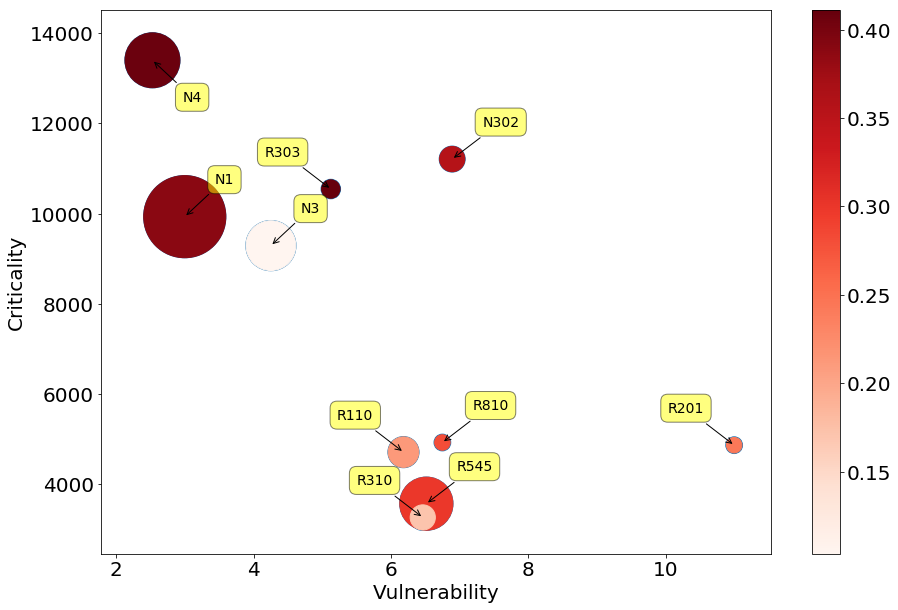

In [49]:
labels = roadTop.roadName
colors = roadTop.TruckFrac#/(roadTop.TruckFrac.max())

size  = []
size2 = []
for t in roadTop.nrBridges.values:
    size.append(math.sqrt(t)*240)
    size2.append(math.sqrt(t)*240 + 40)
# define colormap

# set figure size
fig = plt.figure(figsize=(15,10))

ax1 = plt.scatter(roadTop['bridgeScore'],roadTop['maxAADT'], s=size2)
ax  = plt.scatter(roadTop['bridgeScore'],roadTop['maxAADT'], s=size, c=colors, cmap=plt.cm.Reds)
                                 #roadTop.total/25)


for label, x, y in zip(labels, roadTop['bridgeScore'], roadTop['maxAADT']):
    if label=='R110' or label=='R310' or label=='R201' or label=='R303':
        plt.annotate(
            label,
            xy=(x, y), xytext=(-30, 30), size=14,
            textcoords='offset points', ha='right', va='bottom',
            bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
            arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
    elif label=='N4':
        plt.annotate(
            label,
            xy=(x, y), xytext=(30, -30), size=14,
            textcoords='offset points', ha='left', va='top',
            bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
            arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

    else:
        plt.annotate(
            label,
            xy=(x, y), xytext=(30, 30), size=14,
            textcoords='offset points', ha='left', va='bottom',
            bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
            arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

# set labels
plt.xlabel('Vulnerability', fontsize=20)
plt.ylabel('Criticality', fontsize=20)

# change ticksize
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

# set colorbar
cbar = fig.colorbar(ax)#, ticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5])

#cbar.ax.set_yticklabels(['10%', '20%', '30%','40%','50%'])

In [43]:
roadCrit.sort_values(by=['total'],ascending=False).head(10)

,roadName,bridgeScore,maxAADT,nrBridges,TruckFrac,total
28,N302,6.892857,11206.2,7,0.356458,77242.735714
134,R303,5.125000,10542.3,2,0.411064,54029.287500
112,R201,11.000000,4865.4,1,0.243324,53519.400000
27,N3,4.252336,9288.5,107,0.103492,39497.827103
31,N4,2.527070,13395.8,157,0.408058,33852.125159
193,R810,6.750000,4924.8,1,0.281139,33242.400000
0,N1,2.997459,9930.0,787,0.388587,29764.764930
88,R110,6.183333,4711.2,15,0.211956,29130.920000
153,R545,6.516423,3568.8,137,0.299740,23255.811679
135,R310,6.464286,3264.3,7,0.171677,21101.367857


In [44]:
roadCrit.sort_values(by=['maxAADT'],ascending=False).head(10)

,roadName,bridgeScore,maxAADT,nrBridges,TruckFrac,total
31,N4,2.527070,13395.8,157,0.408058,33852.125159
28,N302,6.892857,11206.2,7,0.356458,77242.735714
134,R303,5.125000,10542.3,2,0.411064,54029.287500
0,N1,2.997459,9930.0,787,0.388587,29764.764930
27,N3,4.252336,9288.5,107,0.103492,39497.827103
29,N303,0.000000,8729.7,0,0.271233,0.000000
18,N2,2.087054,7865.3,560,0.379518,16415.302455
5,N105,1.369565,7138.9,46,0.513351,9777.189130
39,N408,0.000000,6807.7,0,0.354460,0.000000
36,N405,1.703704,6807.7,27,0.354460,11598.303704


In [45]:
roadCrit.sort_values(by=['bridgeScore'],ascending=False).head(10)

,roadName,bridgeScore,maxAADT,nrBridges,TruckFrac,total
112,R201,11.000000,4865.4,1,0.243324,53519.400000
451,Z3609,8.875000,68.0,4,0.034274,603.500000
278,Z1124,8.875000,NaN,2,0.056215,NaN
154,R546,8.571429,579.2,7,0.073046,4964.571429
721,Z7502,8.032051,118.7,39,0.071429,953.404487
802,Z8404,7.983333,313.6,15,0.086650,2503.573333
358,Z1636,7.911765,0.0,17,0.000000,0.000000
158,R550,7.598837,1859.5,43,0.275884,14130.037791
157,R549,7.208333,172.3,30,0.064529,1241.995833
589,Z5553,7.083333,201.6,3,0.015686,1428.000000


In [156]:
bridges = bdf[(bdf['road'] == 'N1')]
bridgeScore(bridges)

2.574015247776366